In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## 1. Load the data

In [2]:
airport = pd.read_csv('../CSV/Airport_operations.csv')
airport.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [3]:
X = pd.DataFrame(airport.ix[:,2:])
y = airport.ix[:,0]

## 2. Format and graph the data

#### 2.1 Plot the data

In [4]:
# sns.pairplot(X)

#### 2.2 Select columns of interest and standardize the data

In [5]:
X_stan = StandardScaler().fit_transform(X)

## 3. DBSCAN

#### 3.1 Setup the DBSCAN from scikit

In [16]:
dbscan = DBSCAN(eps=1.0, min_samples=12).fit(X_stan)

#### 3.2 Calculate the Labels

In [17]:
labels = dbscan.labels_

#### 3.3 Calculate the Core Samples

In [18]:
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscan.core_sample_indices_] = True
print(core_samples)

[ True  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True False False False False False False False
 False False False False  True  True  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False  True False False False False False
 False False False False False False False False  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

#### 3.4 Plot the resulting clusters

In [28]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

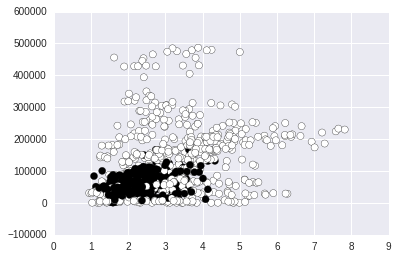

In [29]:
plt.scatter(X.iloc[:,9], X.iloc[:,1], c=dbscan.labels_, s=50)

Now, repeat the above steps for various levels of minimum points and epsilon and see how that affects the results of the DBSCAN algorithm 

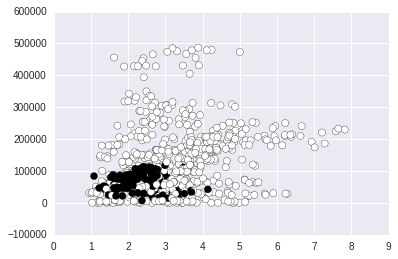

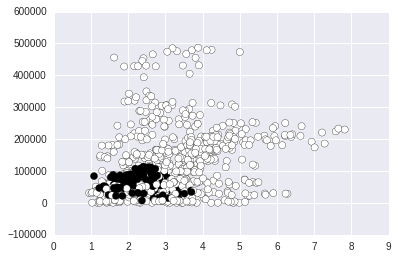

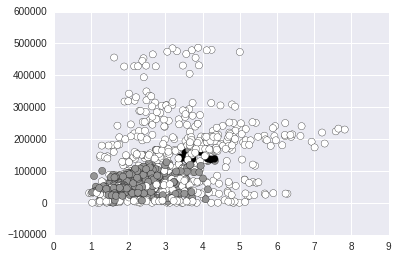

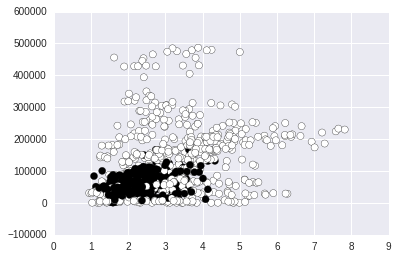

In [30]:
eps = [0.8, 1.0]
min_p = [10, 12]
for e in eps:
    for s in min_p:
        dbscan = DBSCAN(eps=e, min_samples=s).fit(X_stan)
        plt.scatter(X.iloc[:,9], X.iloc[:,1], c=dbscan.labels_, s=50)
        plt.show()

#### 3.5 Perform a K-means Clustering for comparison

In [31]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_stan)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#### 3.6 Plot the resulting clusters

**Hint**: Display the results by cluster color and plot the centroids over the original plot for clarity

*Average airborne delay* and *on time gate arrivals*

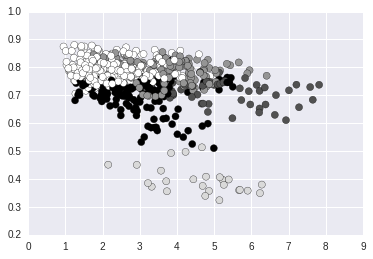

In [34]:
plt.scatter(X['average airborne delay'], X['percent on-time gate arrivals'], c=kmeans.labels_, s=50)
#plt.scatter(centroids[:,9], centroids[:,4], c = ["red","blue"], s = 60 )

*average taxi out time* and *average airport departure delay*

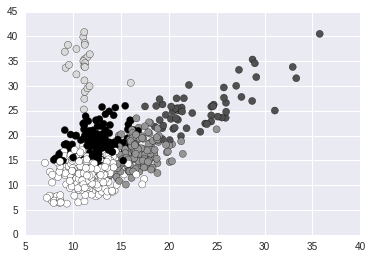

In [35]:
plt.scatter(X['average_taxi_out_time'], X['average airport departure delay'], c=kmeans.labels_, s=50)
#plt.scatter(centroids[:,5], centroids[:,7], c = ["pink","white"], s = 60 )